# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [141]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [142]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [143]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Create endpoint URL with each city
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        city_url = query_url + city
        
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 2 of Set 1 | fujin
Processing Record 3 of Set 1 | thinadhoo
Processing Record 4 of Set 1 | methoni
Processing Record 5 of Set 1 | cuauhtemoc
Processing Record 6 of Set 1 | santa maria
Processing Record 7 of Set 1 | galesong
Processing Record 8 of Set 1 | xique-xique
Processing Record 9 of Set 1 | znamenskoye
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | altay
Processing Record 12 of Set 1 | cap malheureux
Processing Record 13 of Set 1 | mardin
Processing Record 14 of Set 1 | charyshskoye
Processing Record 15 of Set 1 | juana diaz
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | mesyagutovo
Processing Record 19 of Set 1 | chuy
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | dina
Processing Record 22 of Set 1 | carnarvon
Processing 

In [144]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [145]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fujin,47.2600,132.0322,-30.43,95,49,3.25,CN,1674848380
1,thinadhoo,0.5333,72.9333,27.28,75,49,2.70,MV,1674848381
2,methoni,36.8197,21.7049,10.68,78,42,2.09,GR,1674848381
3,cuauhtemoc,28.4167,-106.8667,13.30,16,100,2.55,MX,1674848382
4,santa maria,-29.6842,-53.8069,32.61,52,40,6.17,BR,1674848286


In [146]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [147]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fujin,47.2600,132.0322,-30.43,95,49,3.25,CN,1674848380
1,thinadhoo,0.5333,72.9333,27.28,75,49,2.70,MV,1674848381
2,methoni,36.8197,21.7049,10.68,78,42,2.09,GR,1674848381
3,cuauhtemoc,28.4167,-106.8667,13.30,16,100,2.55,MX,1674848382
4,santa maria,-29.6842,-53.8069,32.61,52,40,6.17,BR,1674848286


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

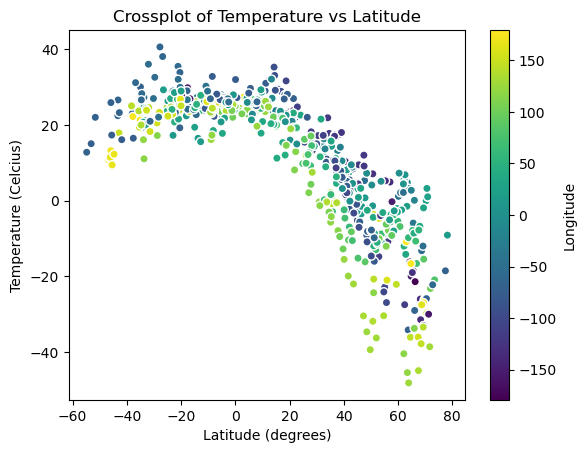

In [159]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
max_temperature = city_data_df["Max Temp"]
longitude=city_data_df["Lng"]


plt.scatter(latitude,max_temperature, c=longitude, edgecolors="white")

# Incorporate the other graph properties
clb = plt.colorbar()
clb.set_label("Longitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Temperature (Celcius)")
plt.title("Crossplot of Temperature vs Latitude")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

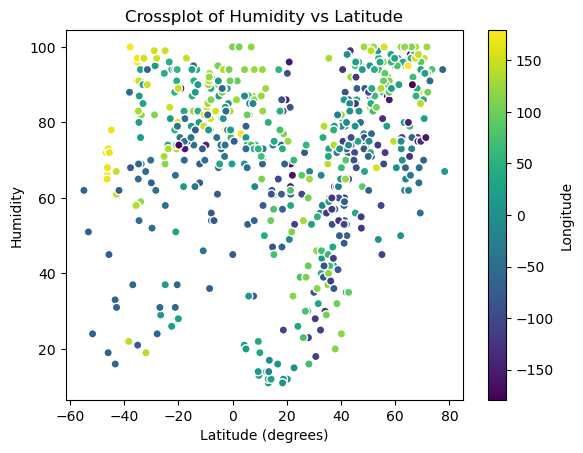

In [160]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]

plt.scatter(latitude,humidity,edgecolors="white",c=longitude)

# Incorporate the other graph properties
clb = plt.colorbar()
clb.set_label("Longitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Humidity")
plt.title("Crossplot of Humidity vs Latitude")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

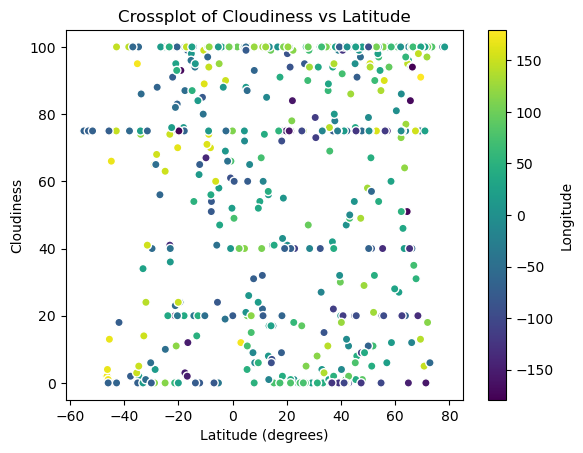

In [161]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(latitude,cloudiness, edgecolors="white",c=longitude)
clb = plt.colorbar()
clb.set_label("Longitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Cloudiness")
plt.title("Crossplot of Cloudiness vs Latitude")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

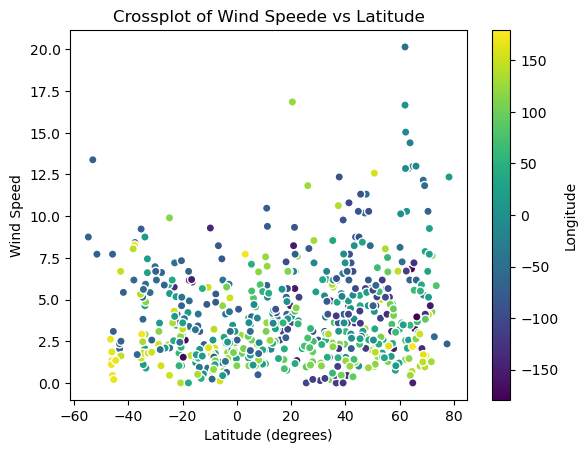

In [175]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

plt.scatter(latitude,wind_speed, c=longitude, edgecolors="white")
# Incorporate the other graph properties
clb = plt.colorbar()
clb.set_label("Longitude")
plt.xlabel("Latitude (degrees)")
plt.ylabel("Wind Speed")
plt.title("Crossplot of Wind Speede vs Latitude")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [311]:
# Define a function to create Linear Regression plots
def linearreg(x_values,y_values,z_values):

    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


    plt.scatter(x_values,y_values, c=z_values, edgecolors="white")

    # Incorporate the other graph properties
    clb = plt.colorbar()
    clb.set_label(z_values.name)
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.title(f"Crossplot of {y_values.name} vs {x_values.name}")
    
    #TODO --> need to figure out how to get the annotations right
    # eq =plt.text(1,1,line_eq)
    # eq.set_color("red")
    # eq.set_fontsize(15)
    plt.annotate(line_eq,xy=(80, 80), xycoords='figure points', fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")

    # Generating the r-square of the linear regression and the Coefficient of correlation
    print(f"The r-squared of the regression is: {rvalue**2:.2f}")
    print(f"The correlation factor is {st.pearsonr(x_values,y_values)[0]:.2f}")

    # Show plot
    plt.show()

In [193]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>0),:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,fujin,47.2600,132.0322,-30.43,95,49,3.25,CN,1674848380
1,thinadhoo,0.5333,72.9333,27.28,75,49,2.70,MV,1674848381
2,methoni,36.8197,21.7049,10.68,78,42,2.09,GR,1674848381
3,cuauhtemoc,28.4167,-106.8667,13.30,16,100,2.55,MX,1674848382
7,znamenskoye,57.1281,73.8282,-5.63,96,100,3.52,RU,1674848383


In [312]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0),:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,santa maria,-29.6842,-53.8069,32.61,52,40,6.17,BR,1674848286
5,galesong,-5.3166,119.3661,24.01,90,100,4.63,ID,1674848382
6,xique-xique,-10.8218,-42.7263,30.26,46,80,0.89,BR,1674848383
10,cap malheureux,-19.9842,57.6142,25.82,90,100,2.98,MU,1674848384
14,ushuaia,-54.8000,-68.3000,12.81,62,75,8.75,AR,1674848386


###  Temperature vs. Latitude Linear Regression Plot

The r-squared of the regression is: 0.71
The correlation factor is -0.84


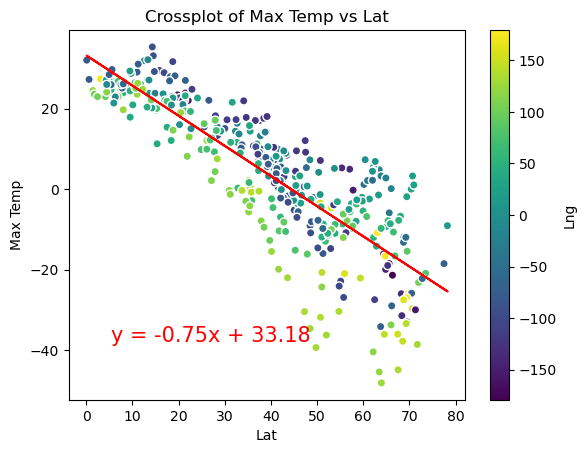

In [313]:
# Linear regression on Northern Hemisphere
north_latitude=northern_hemi_df["Lat"]
north_max_temperature=northern_hemi_df["Max Temp"]
north_longitude=northern_hemi_df["Lng"]

linearreg(north_latitude,north_max_temperature,north_longitude)

The r-squared of the regression is: 0.16
The correlation factor is 0.40


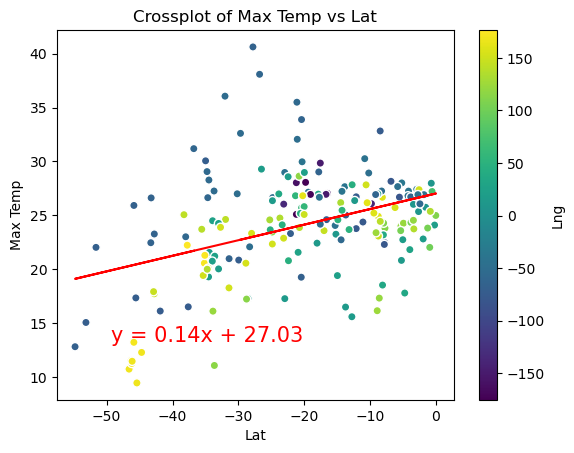

In [314]:
# Linear regression on Southern Hemisphere
south_latitude=southern_hemi_df["Lat"]
south_max_temperature=southern_hemi_df["Max Temp"]
south_longitude=southern_hemi_df["Lng"]

linearreg(south_latitude,south_max_temperature,south_longitude)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared of the regression is: 0.19
The correlation factor is 0.43


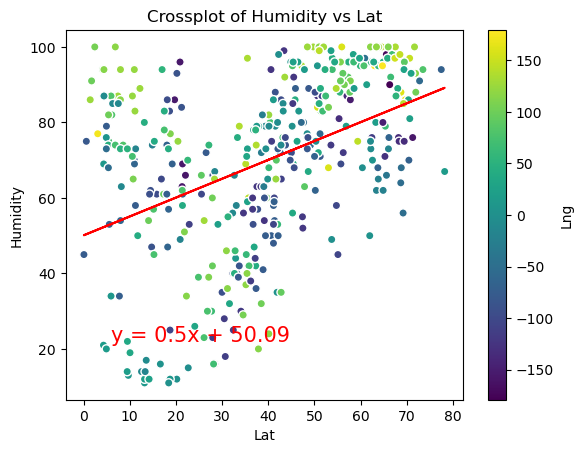

In [292]:
# Northern Hemisphere
north_humidity=northern_hemi_df["Humidity"]

linearreg(north_latitude,north_humidity,north_longitude)

The r-squared of the regression is: 0.12
The correlation factor is 0.35


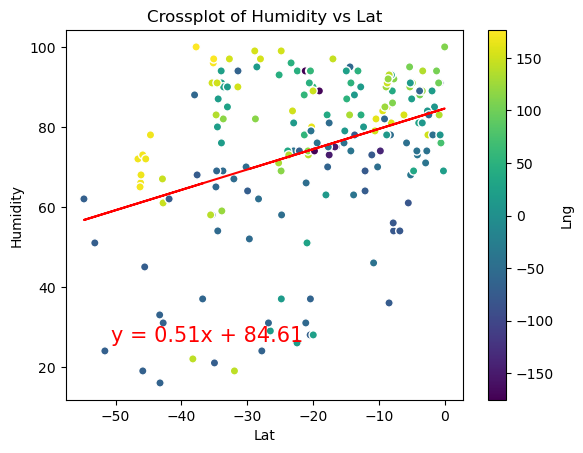

In [293]:
# Southern Hemisphere
south_humidity=southern_hemi_df["Humidity"]

linearreg(south_latitude,south_humidity,south_longitude)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared of the regression is: 0.04
The correlation factor is 0.20


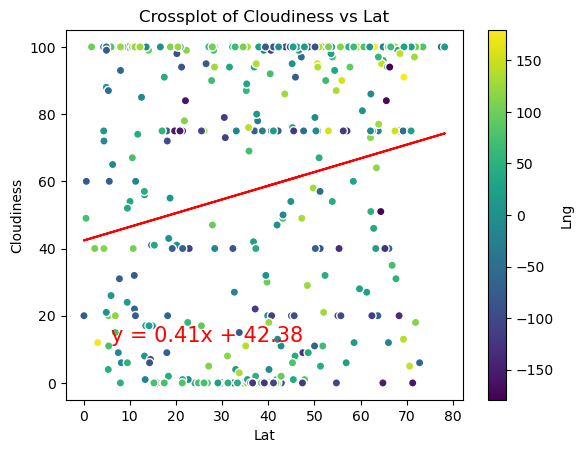

In [294]:
# Northern Hemisphere
north_cloudiness=northern_hemi_df["Cloudiness"]

linearreg(north_latitude,north_cloudiness,north_longitude)

The r-squared of the regression is: 0.12
The correlation factor is 0.35


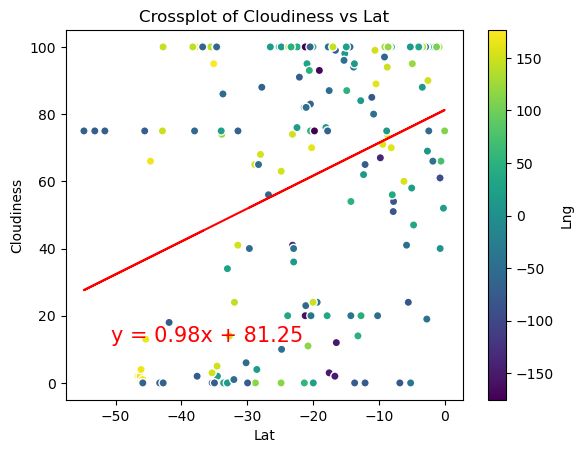

In [295]:
# Southern Hemisphere
south_cloudiness=southern_hemi_df["Cloudiness"]

linearreg(south_latitude,south_cloudiness,south_longitude)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared of the regression is: 0.03
The correlation factor is 0.17


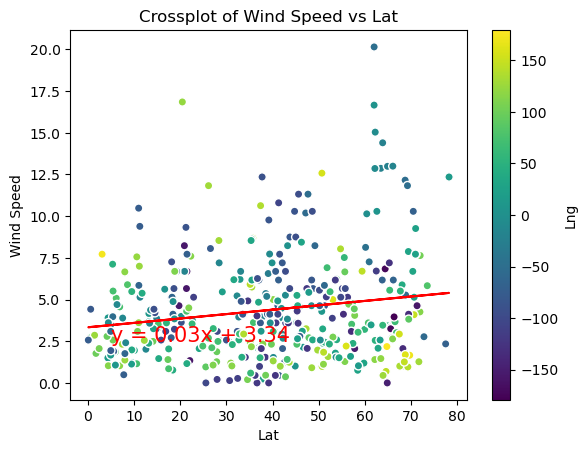

In [296]:
# Northern Hemisphere
north_windspeed=northern_hemi_df["Wind Speed"]

linearreg(north_latitude,north_windspeed,north_longitude)

The r-squared of the regression is: 0.08
The correlation factor is -0.28


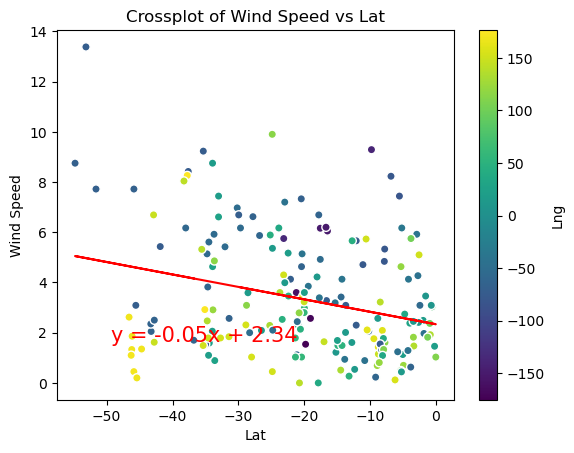

In [297]:
# Southern Hemisphere
south_windspeed=southern_hemi_df["Wind Speed"]

linearreg(south_latitude,south_windspeed,south_longitude)

**Discussion about the linear relationship:** YOUR RESPONSE HERE